In [2]:
import pandas as pd 
import plotly.express as px
import numpy as np 


In [3]:
df = pd.read_csv("telecom_churn.csv")
df

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

In [4]:
# Summary of data 
df.describe()

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16.426032     2.535712   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.400000   114.000000      66.200000    11.770000   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000

In [5]:
# check null and duplicate data
print(df.isna().sum())
print(f"duplicated data: {df.duplicated().sum()}")

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64
duplicated data: 0


In [4]:
df["Churn"] = df["Churn"].map({0:"Continued Service",1:"Canceled Service"})
df["ContractRenewal"] = df["ContractRenewal"].map({0:"No Recent Renewal",1:"Recent Renewal"})
df["DataPlan"] = df["DataPlan"].map({0:"No Data Plan",1:"Has Data Plan"})

#### Overall Statistic

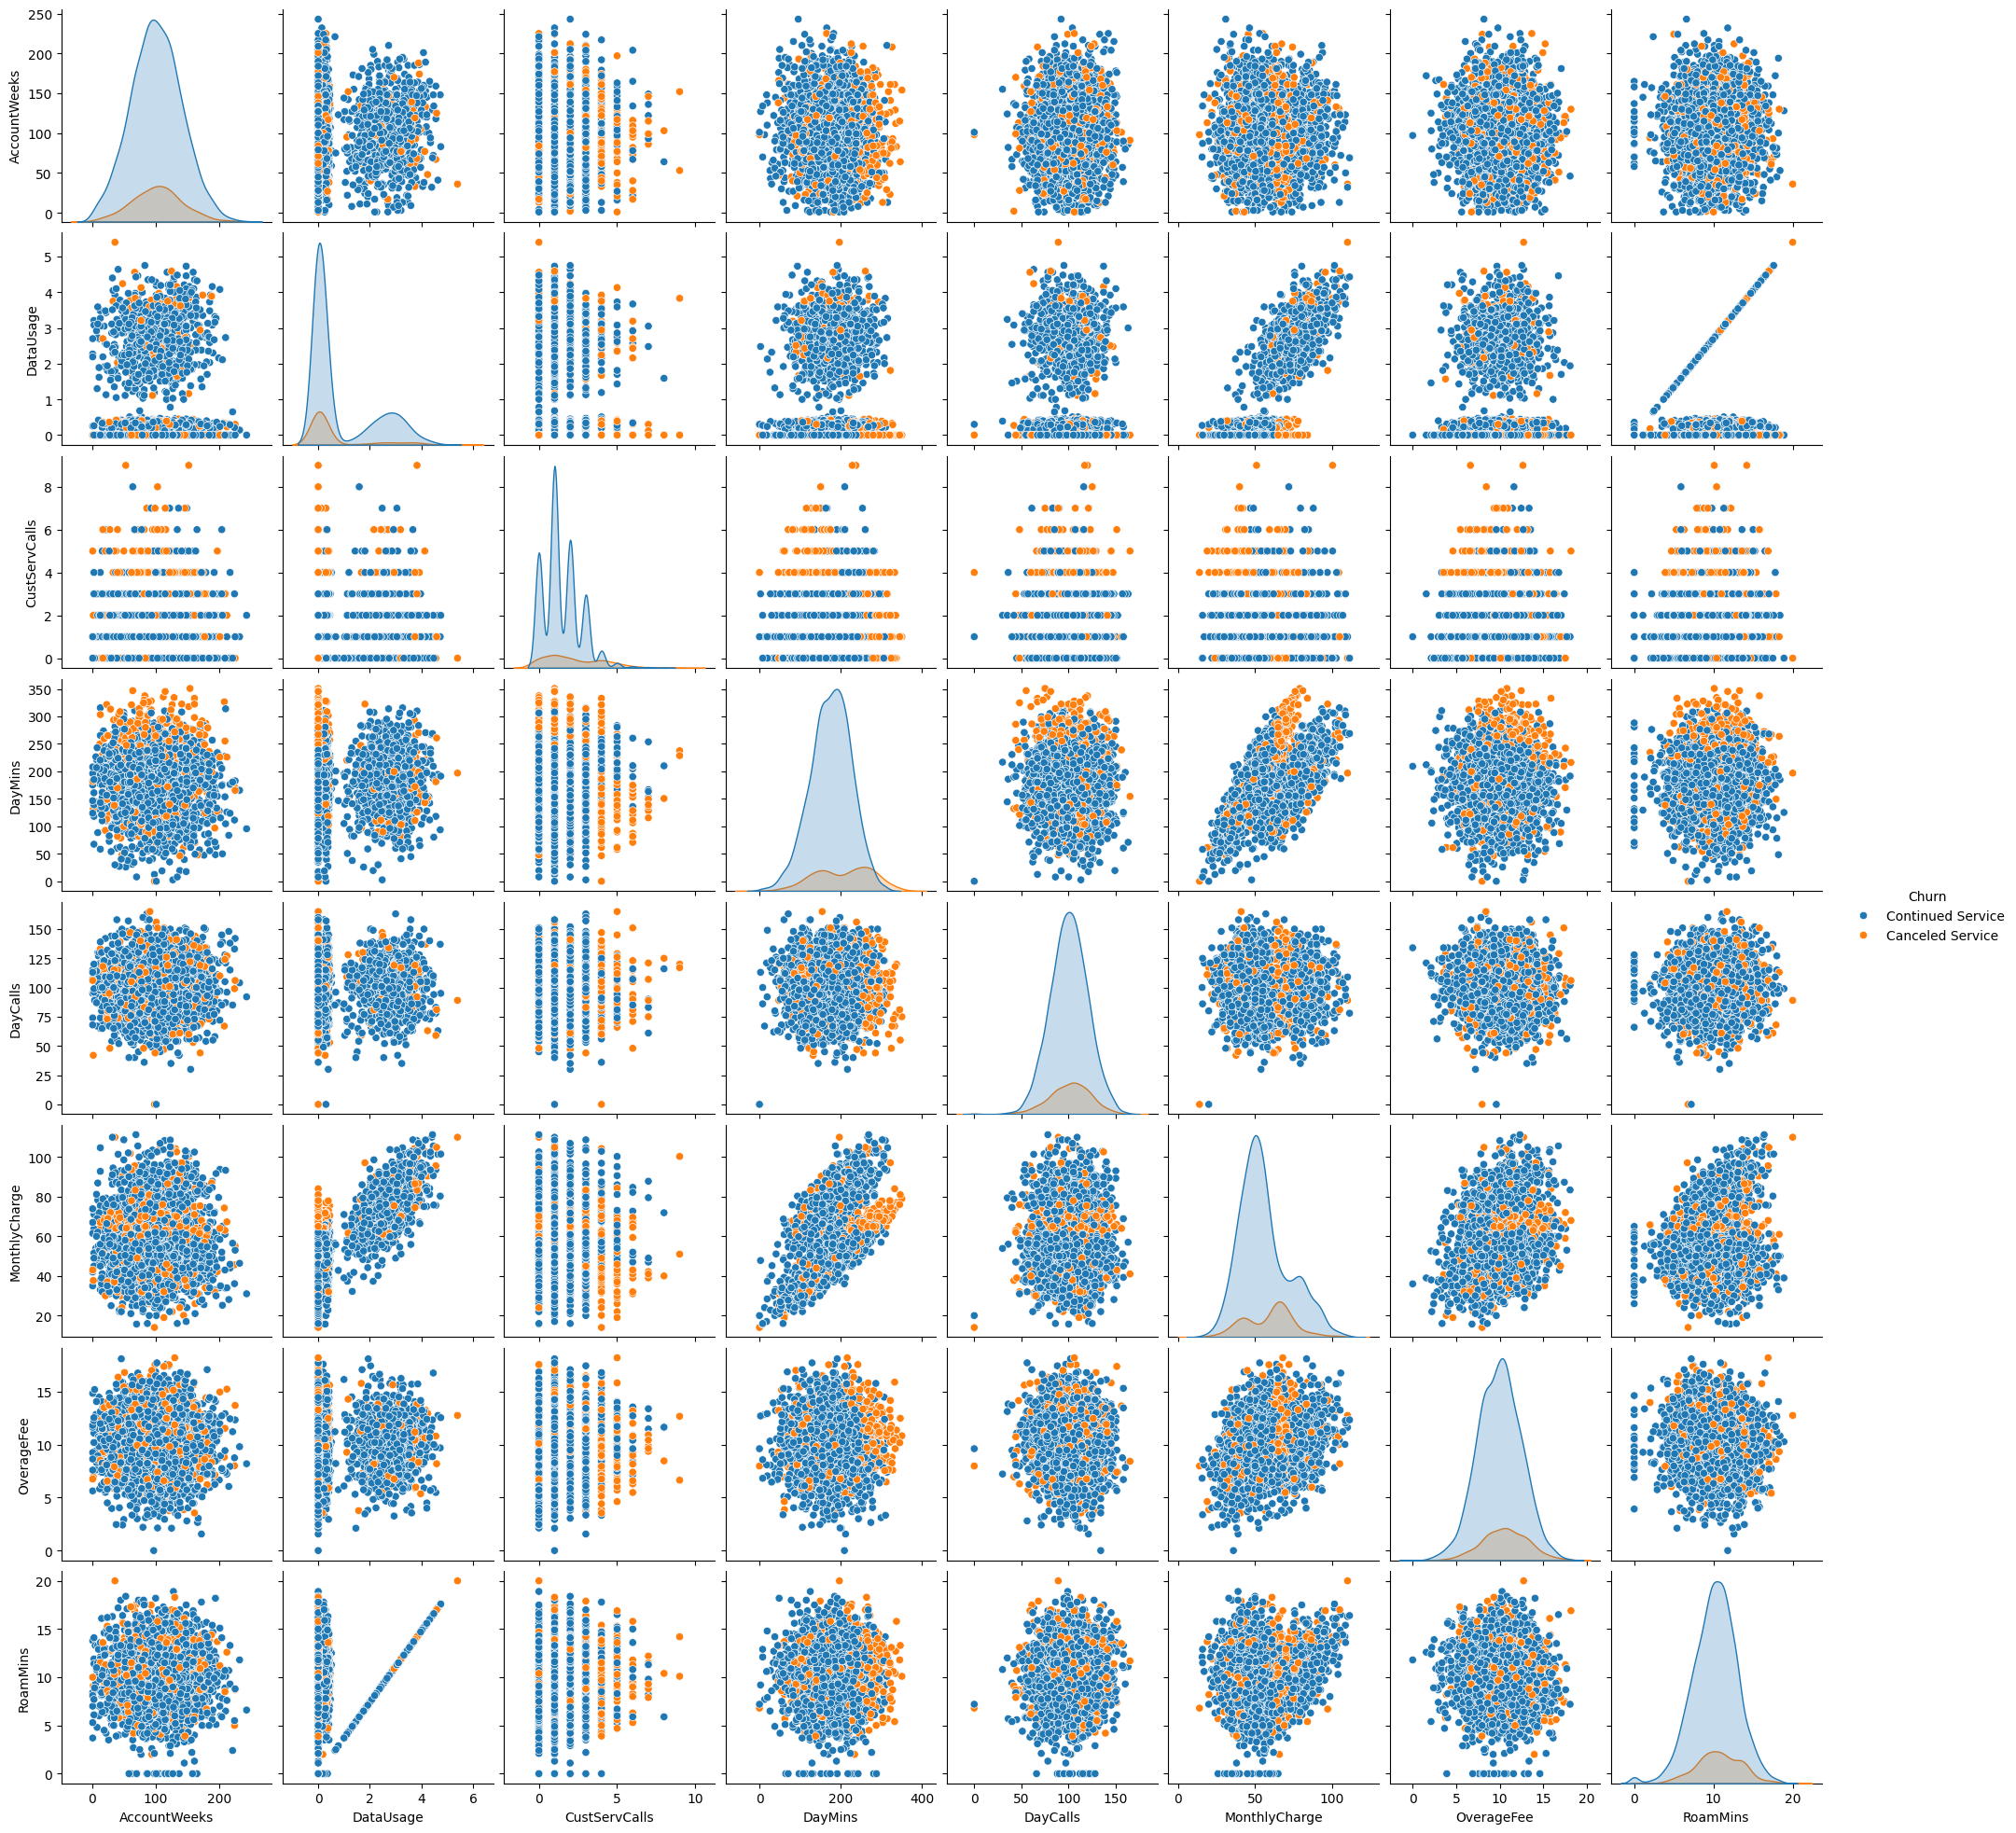

In [66]:
import seaborn as sb 
sb.pairplot(df,hue = "Churn")

##### Percentage of Churn vs Not Churn data

In [ ]:
fig = px.pie(df,names = "Churn", opacity=0.8)
fig.show()

We can see that there is imbalance data between `Churn` and `not Churn` 

In [133]:
numeric_df = pd.read_csv("telecom_churn.csv")
cor = numeric_df.corr()
fig = px.imshow(cor,text_auto=True)
fig.show()

This is the correlation matrix of all the data. In the next section we will go through a comparison of data that has correlation more than 0.2 or less than -0.2

##### Churn vs ContractRenewal

In [148]:
fig = px.histogram(df,"ContractRenewal",color = "Churn", opacity= 0.75)
fig.show()

In [149]:

grouped = df.groupby(["ContractRenewal", "Churn"]).size().reset_index(name="Count")

grouped["Percentage"] = grouped.groupby("ContractRenewal")["Count"].transform(lambda x: 100 * x / x.sum())

fig = px.bar(
    grouped, 
    x="ContractRenewal", 
    y="Percentage", 
    color="Churn", 
    text=grouped["Percentage"].round(1).astype(str) + "%",  # Display percentage labels
    opacity = 0.75,
    category_orders={"ContractRenewal": ["Recent Renewal", "No Recent Renewal"],"Churn":["Continued Service","Canceled Service"]}
)

fig.show()

After switching from count to percentage, we observe that customers who recently renewed their contracts are less likely to terminate the service compared to those who did not renew. This suggests that contract renewal may be driven by customer trust and satisfaction with our company. Customers who choose to renew likely have a positive experience or see value in continuing the service, whereas those who do not renew may already be considering termination. 

##### CustServCall vs Churn

In [140]:
fig = px.histogram(df,"CustServCalls",color = "Churn",opacity = 0.75)
fig.show()

In [142]:
grouped = df.groupby(["CustServCalls", "Churn"]).size().reset_index(name="Count")

grouped["Percentage"] = grouped.groupby("CustServCalls")["Count"].transform(lambda x: 100 * x / x.sum())

fig = px.bar(
    grouped, 
    x="CustServCalls", 
    y="Percentage", 
    color="Churn", 
    text=grouped["Percentage"].round(1).astype(str) + "%",  # Display percentage labels
    opacity = 0.75,
    category_orders={"Churn":["Continued Service","Canceled Service"]}
)

fig.show()

Similar to `Contract Renewal`, an increase in `Customer Service Calls` (CustServCalls) is associated with a higher likelihood of service cancellation. However, this relationship may also suggest that customers who eventually cancel the service are more likely to have contacted customer support multiple times before making their decision.

At the same time, the higher **likelihood of cancellation** might also be linked to a **lower proportion** of customers making frequent service calls, meaning that while dissatisfied customers tend to call more, the overall number of such customers remains relatively small. 

##### DayMin vs Churn

In [144]:
fig = px.histogram(df,"DayMins",color = "Churn",opacity = 0.75)
fig.show()

Based on the graph, we observe that the distribution of `DayMins` for customers with **Continued Service** follows a nearly normal distribution. In contrast, the distribution for customers with **Canceled Service** appears bimodal, suggesting two distinct usage patterns.

Statistically, there is no **direct correlation** between these two distributions, meaning that the difference in shape is not necessarily indicative of a direct relationship between Churn and Non-Churn. Instead, the observed correlation may stem from an imbalance in the dataset or underlying factors influencing churn behavior.

##### Data Plan vs Data usage

In [8]:
fig = px.histogram(df,"DataUsage",color = "DataPlan",opacity = 0.75)
fig.show()

From the graph, we observe that customers **without a data plan** mostly use between 0 and 0.5 units of data, whereas those **with a data plan** tend to use significantly more, typically between 1 and 5 units. Additionally, the distribution appears to be separated into two distinct components, which may indicate a strong dependency between Data Plan and Data Usage. This separation could lead to **multicollinearity** in predictive models, as the presence of a data plan almost directly determines the range of data usage, making these two variables highly correlated.

##### Monthly Charge vs Data Usage (Data Plan)
Since `Dataplan` and `DataUsage` has high correlation and should similar result, we decided analyze `DataUsage` and seperate data using `DataPlan`

In [14]:
fig = px.scatter(df,y = "DataUsage",x = "MonthlyCharge", color = "DataPlan", opacity = 0.75)
fig.show()

As illustrated in the graph, the data is separated into two clusters based on the `Data Plan.`

For customers **without a data plan**, data usage remains low regardless of an increase in monthly charges. This suggests that monthly charges account for other telecom features beyond data usage, such as call or SMS plans.

On the other hand, for customers **with a data plan**, data usage increases as monthly charges rise, implying that higher monthly charges may correspond to more extensive data plans. This distinction highlights a key relationship between data plans and pricing structure, reinforcing that monthly charges influence data usage differently depending on the presence of a data plan

##### Monthly Charge vs DayMins

In [7]:
fig = px.scatter(df,y = "DayMins",x = "MonthlyCharge",color = "DataPlan", opacity = 0.75)
fig.show()

According to the graph, the data can divide into two clusters between **with data plan** and **without data plan**. These two data have the same increasing trend, however, the one that include data plan has a higher charge that might cause from the additional data.

#### Data Imbalanced 

#####  SMOTE (Synthetic Minority Over-Sampling Technique)

We address the issue of class imbalance using SMOTE (Synthetic Minority Over-Sampling Technique) to generate synthetic samples for the minority class based on `Churn`. SMOTE enhances the dataset by selecting a minority class instance, identifying its k-nearest neighbors, and creating synthetic points along the line connecting them. This approach helps improve model performance by preventing bias toward the majority class.

We choose **oversampling** over undersampling because the minority class **contains too few data points** for effective training. Undersampling would remove valuable information from the majority class, potentially leading to loss of critical patterns and suboptimal model performance. By using SMOTE, we maintain the dataset’s diversity while ensuring balanced class representation.

In [28]:
from imblearn.over_sampling import SMOTE
df = pd.read_csv("telecom_churn.csv")
x = df.drop(columns=["Churn"])
y = df["Churn"]

smote = SMOTE(random_state = 20)

x_smote, y_smote = smote.fit_resample(x, y)


In [29]:
df_smote = pd.concat([y_smote,x_smote],axis = 1)
df_smote

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1   2.700000   
1         0           107                1         1   3.700000   
2         0           137                1         0   0.000000   
3         0            84                0         0   0.000000   
4         0            75                0         0   0.000000   
...     ...           ...              ...       ...        ...   
5695      1            19                1         0   0.000000   
5696      1           211                1         0   0.206264   
5697      1           121                0         0   0.130437   
5698      1           126                1         0   0.014430   
5699      1            60                0         0   0.000000   

      CustServCalls     DayMins  DayCalls  MonthlyCharge  OverageFee  \
0                 1  265.100000       110      89.000000    9.870000   
1                 1  161.600000       123      82.000000    9.780000   
2                 0  243.400000       114      52.000000    6.060000   
3                 2  299.400000        71      57.000000    3.100000   
4                 3  166.700000       113      41.000000    7.420000   
...             ...         ...       ...            ...         ...   
5695              1  314.261804       117      73.011850   10.964799   
5696              2  229.003103       126      66.856242   14.848162   
5697              2  239.327324        87      64.440986   12.903648   
5698              2  250.246873        96      64.865007   12.892390   
5699              2  288.930601       100      70.826120   12.750440   

       RoamMins  
0     10.000000  
1     13.700000  
2     12.200000  
3      6.600000  
4     10.100000  
...         ...  
5695  11.379763  
5696  12.176882  
5697  11.089437  
5698  12.606901  
5699  11.413098  

[5700 rows x 11 columns]

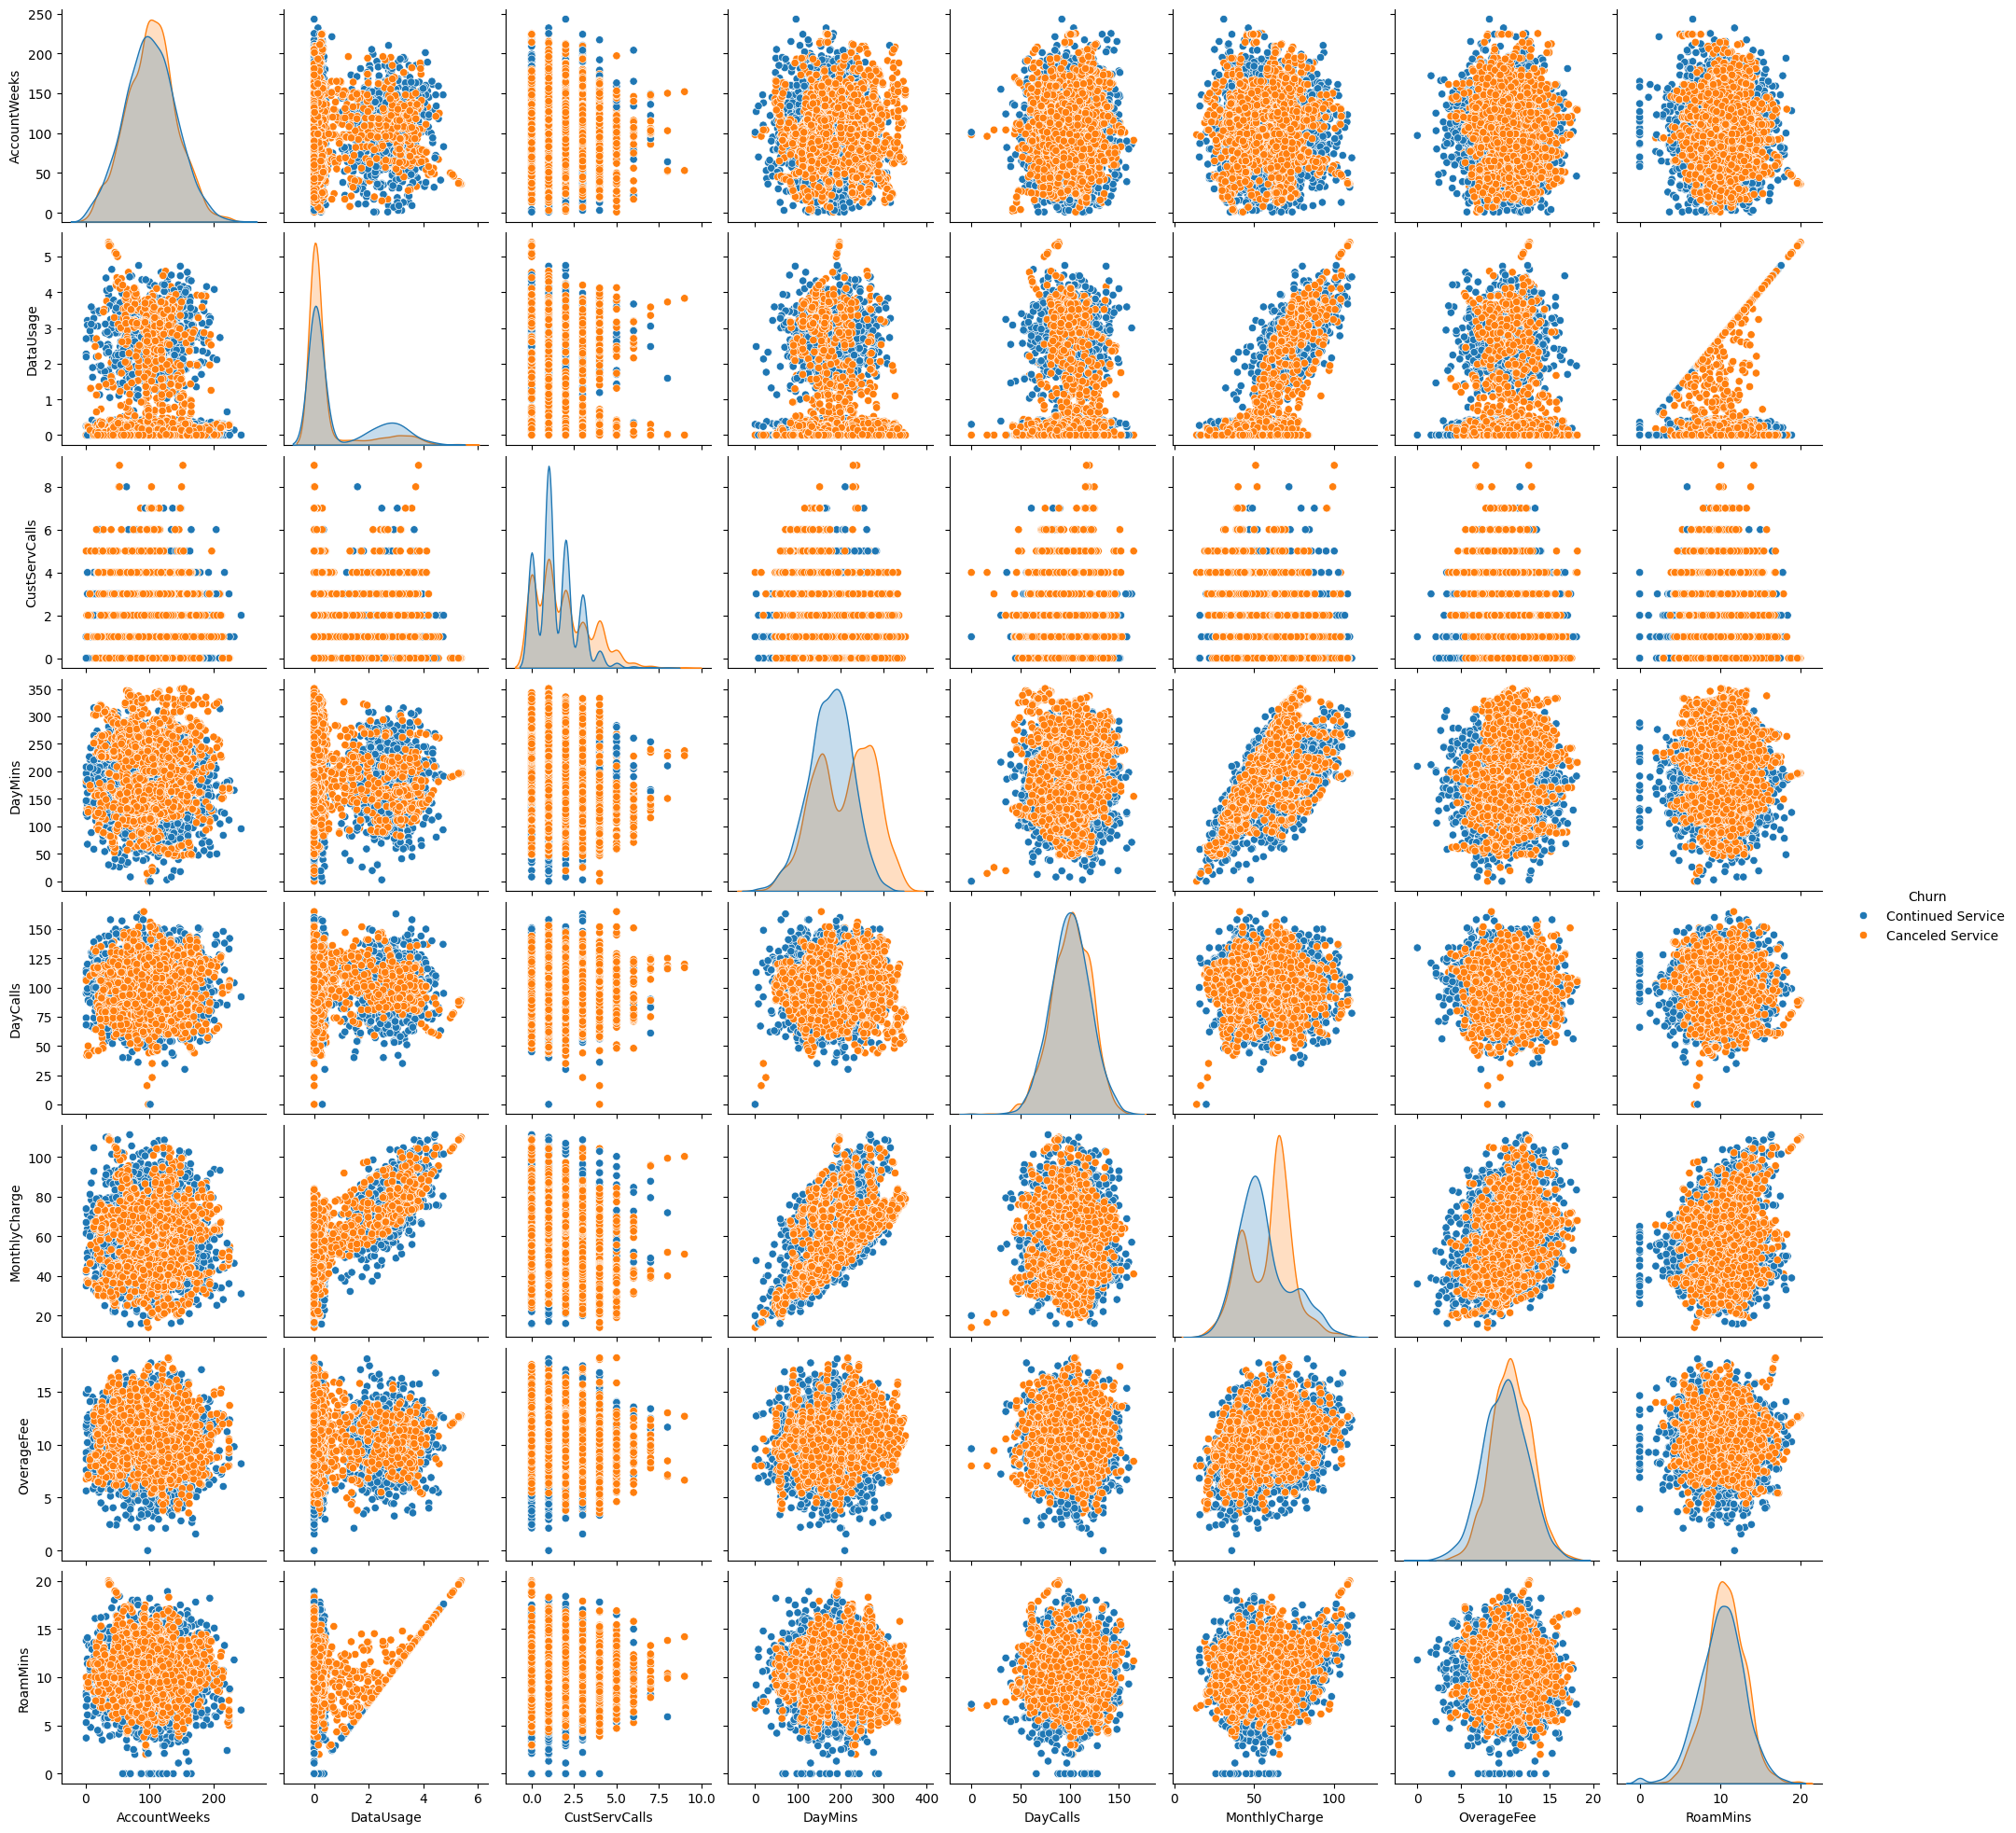

In [24]:
df_smote["Churn"] = df_smote["Churn"].map({0:"Continued Service",1:"Canceled Service"})
df_smote["ContractRenewal"] = df_smote["ContractRenewal"].map({0:"No Recent Renewal",1:"Recent Renewal"})
df_smote["DataPlan"] = df_smote["DataPlan"].map({0:"No Data Plan",1:"Has Data Plan"})

sb.pairplot(df_smote,hue = "Churn")

In [27]:
fig = px.pie(df_smote,names = "Churn", opacity=0.8)
fig.show()

In [30]:
cor = df_smote.corr()
fig = px.imshow(cor,text_auto=True)
fig.show()

We can see that the different between data before and after **SMOTE** is a number of data points that increase from 3333 to 5700 data points. With this adjustment, the percentage of people who canceled the service and people who retained the service is come closer to 50%. Additionally, the correlation of the dataset is the same as a result from **SMOTE** which generated a data based on k-nearest neighbors.

In [32]:
# export dataset
df_smote.to_csv("telecom_churn_smote.csv", index = False)